# Project Title : Risk Assesment of Aircraft for Commercial and Private Operations

## 1. Business Understanding 

#### Project Goal
To analyze National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.To determine which aircraft are the lowest risk for the company, translate the  findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. 

#### Data source
The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

#### Key Questions:
1. Which aircraft type have the lowest accident rates?
2. Are there specific manufacturers associated with higher safety standards?
3. How do accident severities vary across aircraft types and manufacturers?
4. Are there specific times, places, or circimstances under which the risk is heightened for certain aircraft types?

#### Success Criteria:
1. Identify aircraft that have a low accident frequency and severity history
2. Provide actionable recommendations on model of aircaft that fit the company's operational needs.

## 2. Data Understanding


In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
# Load the dataset.

df = pd.read_csv('AviationData.csv', engine='python')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# checking the tail of the data
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
# Summary statistics of the numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
# Size of the data
df.shape

(88889, 31)

In [6]:
# Summary of the Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## 3. Data Preparation
##### Data Cleaning 


In [7]:
# Checking the numner of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [8]:
# I am going to drop columns that have roughly more than 25% of their data missing 
# More columns which are not important for my analysis, i drop for easier halnding of the data
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code','Accident.Number', 'Registration.Number',
                   'Amateur.Built', 'Publication.Date', 'Report.Status', 'Engine.Type',
                   'Airport.Name','Aircraft.Category', 'FAR.Description', 'Schedule', 
                   'Air.carrier', 'Broad.phase.of.flight']
df_clean = df.drop(columns=columns_to_drop)

In [9]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [10]:
# Rename some columns in the DataFrame
rename_columns = {
        'Event.Id':'ID', 'Investigation.Type': 'Type', 'Event.Date': 'Date',
        'Injury.Severity': 'Injury_severity', 'Aircraft.damage': 'Damage_type',
        'Number.of.Engines': 'Engines', 'Purpose.of.flight': 'Flight_Purpose',
        'Total.Fatal.Injuries': 'Fatal_Injuries','Total.Serious.Injuries': 'Serious_Injuries',
        'Total.Minor.Injuries': 'Minor_Injuries', 'Total.Uninjured': 'Uninjured',
        'Weather.Condition': 'Weather'}
df_clean.rename(columns=rename_columns, inplace=True)

In [11]:
df_clean.head()

,ID,Type,Date,Location,Country,Injury_severity,Damage_type,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                88889 non-null  object 
 1   Type              88889 non-null  object 
 2   Date              88889 non-null  object 
 3   Location          88837 non-null  object 
 4   Country           88663 non-null  object 
 5   Injury_severity   87889 non-null  object 
 6   Damage_type       85695 non-null  object 
 7   Make              88826 non-null  object 
 8   Model             88797 non-null  object 
 9   Engines           82805 non-null  float64
 10  Flight_Purpose    82697 non-null  object 
 11  Fatal_Injuries    77488 non-null  float64
 12  Serious_Injuries  76379 non-null  float64
 13  Minor_Injuries    76956 non-null  float64
 14  Uninjured         82977 non-null  float64
 15  Weather           84397 non-null  object 
dtypes: float64(5), object(11)
memory usage: 

In [13]:
df_clean.isna().sum()

ID                      0
Type                    0
Date                    0
Location               52
Country               226
Injury_severity      1000
Damage_type          3194
Make                   63
Model                  92
Engines              6084
Flight_Purpose       6192
Fatal_Injuries      11401
Serious_Injuries    12510
Minor_Injuries      11933
Uninjured            5912
Weather              4492
dtype: int64

In [14]:
# Standsrdize the Injury_severity & Fatal_injuries 
# The columns provide the same information
# Drop Fatal_Injuries column 

df_clean.drop('Injury_severity', axis=1 , inplace=True)
df_clean.head()

,ID,Type,Date,Location,Country,Damage_type,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC


##### Exploratory Data Analysis (EDA)

In [15]:
# correlation 
df_clean.corr()

,Engines,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured
Engines,1.000000,0.098505,0.046157,0.098162,0.406058
Fatal_Injuries,0.098505,1.000000,0.135724,0.073559,-0.015214
Serious_Injuries,0.046157,0.135724,1.000000,0.326849,0.052869
Minor_Injuries,0.098162,0.073559,0.326849,1.000000,0.147770
Uninjured,0.406058,-0.015214,0.052869,0.147770,1.000000


<AxesSubplot:>

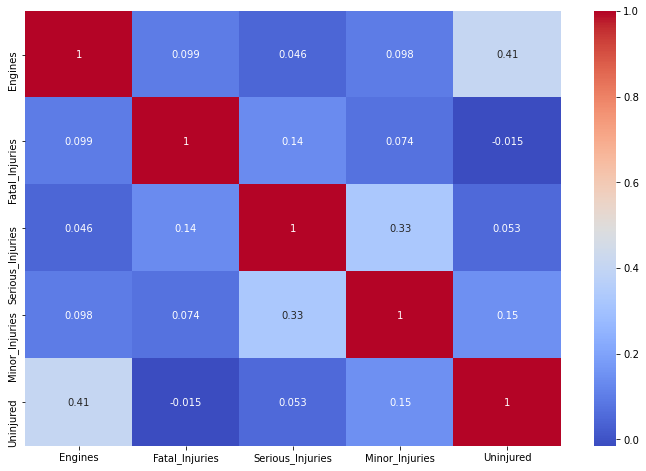

In [16]:
# Plot a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(),annot=True, cmap='coolwarm')

###### Observations 
1. Positive correlation: Engines and minor_injuries there is a strong postive correlation between these two variables by suggeting  that as the number of engines increases the number of of minor injuries tends to increase.
2. Negative  correlations: Engines and Uninjured show a moderate negative correlation as the number of engines increases, number of uninjured individuals tends to decrease.

The heatmap suggests that there might be a relationship between the number of eingine systems and likelihood of accidents and injuries.

In [17]:
# Pairplots
#sns.pairplot(df_clean)
#plt.show()

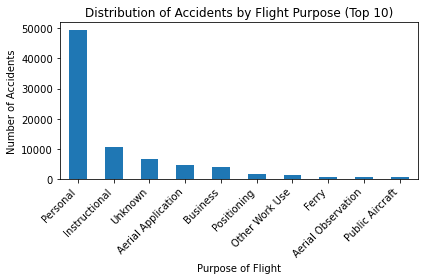

In [23]:
# Exploring the purpose of flights involved in accidents

top_10_purposes = df_clean['Flight_Purpose'].value_counts().nlargest(10).sort_values(ascending=False)


plt.figure(figsize=(6, 4))
top_10_purposes.plot(kind='bar')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()
# Significant number of personal flights are responsible for aviation accidents


In [25]:
# The relationship between Makes, Models and engine types with accidents 
make_model_accident_counts = df_clean.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
5745,Cessna,152,2168
5767,Cessna,172,1254
5811,Cessna,172N,996
15079,Piper,PA-28-140,812
5720,Cessna,150,716
...,...,...,...
8312,Engineering & Research,ERCOUPE 415-CD,1
8314,Engineering and Research,415C,1
8315,Engleman,PITTS S1,1
8316,English,PIETENPOL AIRCAMPER,1


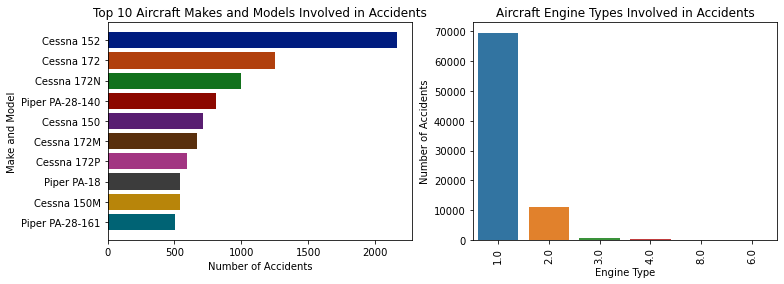

In [28]:
# Exploring what Make, Model and engine type involved in more accidents

df_clean['Engines'] = df_clean['Engines'].replace(0.0, np.nan) # some values in Engine column are 0. I am not an expert but 
# I am not sure if we have any aircraft with 0 engine. So I treat them as missing values

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


top_10_make_model = make_model_accident_counts.head(10)
colors = sns.color_palette("dark", len(top_10_make_model))
axes[0].barh(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['AccidentCount'], color=colors)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
axes[0].invert_yaxis()


axes[1].set_xticks([])
sns.countplot(data=df_clean, x='Engines', order=df_clean['Engines'].value_counts().index, ax=axes[1])
axes[1].set_title('Aircraft Engine Types Involved in Accidents')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_xlabel('Engine Type')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Engine Type')

plt.show()

In [31]:
# changing date type to the appropriate format and creating a column for seasons
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_clean['Season'] = df_clean['Month'].map(seasons)

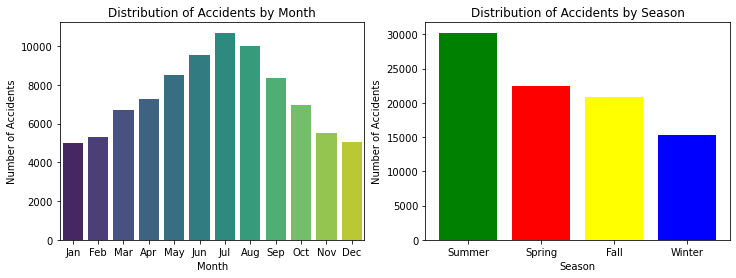

In [39]:
# Plot distribution of accidents by months and seasons

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=df_clean, x='Month', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'blue',
    'Spring': 'red',
    'Summer': 'green',
    'Fall': 'yellow'
}


seasonal_accident_counts = df_clean['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'taupe') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

# Most accidents happen in the summer

# 4. Recommendations

>Personal flights are responsible for a high percentage of aviation accidents. In the area of personal flights, detailed education and training courses should be encouraged for pilots. The safety-first culture has to be nourished within the community of personal aviation. Minimizing the occurrence of accidents in personal flights depends on how safety is considered the priority in every personal flying activity. Whichever the weather condition, pilots must be very prepared and informed of the possible risks to be taken in personal aviation.

>Most accidents occur in summer. In good weather, pilots may become overly confident and feel there is less risk than in poor weather conditions. This can result in a casual approach toward safety procedures and / or unsafe behavior, like flying low, going too fast, or using aerobatics, which raise the accident risk. The remedy is to encourage responsible flying practices and avoid taking unnecessary risks by proper training and awareness. It is also a re-emphasis on flying inside the safety envelope to avert accidents.

>Aircraft makes and models, and engine types, in accidents. The Cessna 152 is the highest aircraft model in the number of accidents, followed by the Cessna 172. The opposite is observed in the case of the type of engine: the "1.0" type is dominant, while all others have much lower accident numbers. These findings might indicate that higher accident rates are related to models Cessna 152 and 172, combined with engine type "1.0.". Recommendations include: (1) Targeted safety investigations into these specific models and engine types to identify potential design flaws or operational issues; (2) Increased pilot training and education for these aircraft to address any recurring factors contributing to accidents; (3) Regular maintenance and inspections of these models and engines to ensure their continued airworthiness.